In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
from IPython.display import Markdown as md
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
def day(n):
    return datetime(2020, 2, 3) + timedelta(n)

In [3]:
rundf = pd.read_csv('results/'+
        'SIsaR_0.9.5 experiments 2 seeds-table_1000_basic_control_schoolOnSept.csv',
                    sep=',',skiprows=6)
case="# 1000 epidemics with non-pharmaceutical containment measures, "+\
          "schools open in Sep"
md(case)

# 1000 epidemics with non-pharmaceutical containment measures, schools open in Sep

In [4]:
rundf["totalInfected"]=rundf["cumulativeRedCount"]+rundf["cumulativeVioletCount"]
rundf["totalInfected&Deceased"]=rundf["totalInfected"]+rundf["cumulativeDeadCount"]
rundf["totalInfected&Deceased"]=rundf["totalInfected"]+rundf["cumulativeDeadCount"]

In [5]:
rundf.columns

Index(['[run number]', 'run#', '[step]', 'seed0', 'seed', 'cp1cRed',
       'cp1cRedNH', 'cp1cViolet', 'cp1cVioletNH', 'cp1cDead', 'cp2cRed',
       'cp2cRedNH', 'cp2cViolet', 'cp2cVioletNH', 'cp2cDead', 'cp3cRed',
       'cp3cRedNH', 'cp3cViolet', 'cp3cVioletNH', 'cp3cDead', 'cp4cRed',
       'cp4cRedNH', 'cp4cViolet', 'cp4cVioletNH', 'cp4cDead',
       'cumulativeRedCount', 'cumulativeVioletCount', 'cumulativeDeadCount',
       'ticks', 'TinfSch', 'SinfSch', 'TinfNotSch', 'SinfNotSch',
       'totalInfected', 'totalInfected&Deceased'],
      dtype='object')

In [6]:
rundf.replace(-1, np.nan, inplace=True)

In [7]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [8]:
rundf[['cp1cRedNH','cumulativeRedCount','totalInfected&Deceased','ticks']].describe()

,cp1cRedNH,cumulativeRedCount,totalInfected&Deceased,ticks
count,997.00,1000.00,1000.00,1000.00
mean,3.86,122.49,340.00,210.63
std,7.44,132.01,390.32,131.16
min,0.00,0.00,2.00,26.00
25%,0.00,14.00,29.00,102.00
50%,0.00,49.00,100.00,161.00
75%,3.00,257.00,774.75,323.00
max,49.00,431.00,1157.00,591.00


In [9]:
tmp=rundf[['cp1cRedNH','cumulativeRedCount','totalInfected&Deceased','ticks']].describe()

In [10]:
print (tmp.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  cp1cRedNH &  cumulativeRedCount &  totalInfected\&Deceased &   ticks \\
\midrule
count &     997.00 &             1000.00 &                 1000.00 & 1000.00 \\
mean  &       3.86 &              122.49 &                  340.00 &  210.63 \\
std   &       7.44 &              132.01 &                  390.32 &  131.16 \\
min   &       0.00 &                0.00 &                    2.00 &   26.00 \\
25\%   &       0.00 &               14.00 &                   29.00 &  102.00 \\
50\%   &       0.00 &               49.00 &                  100.00 &  161.00 \\
75\%   &       3.00 &              257.00 &                  774.75 &  323.00 \\
max   &      49.00 &              431.00 &                 1157.00 &  591.00 \\
\bottomrule
\end{tabular}



The output is included within:  
\begin{table}[htbp] or [H]

... output above ...

\label{a label}  
\caption{a caption}  
\end{table}


## 1 simulation time

array([[<AxesSubplot:title={'center':'ticks'}>]], dtype=object)

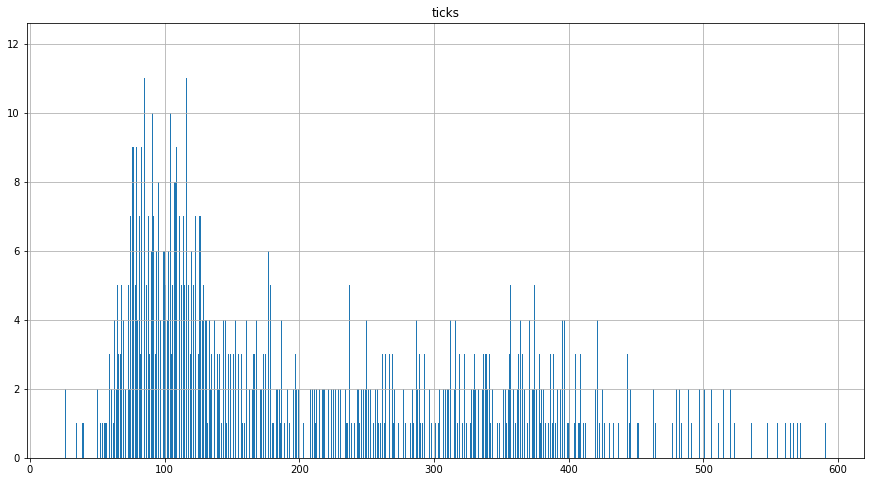

In [11]:
rundf.hist(column="ticks",bins=1000,figsize=(15,8))

## 2 symptomatic agent cumulative count

array([[<AxesSubplot:title={'center':'cumulativeRedCount'}>]],
      dtype=object)

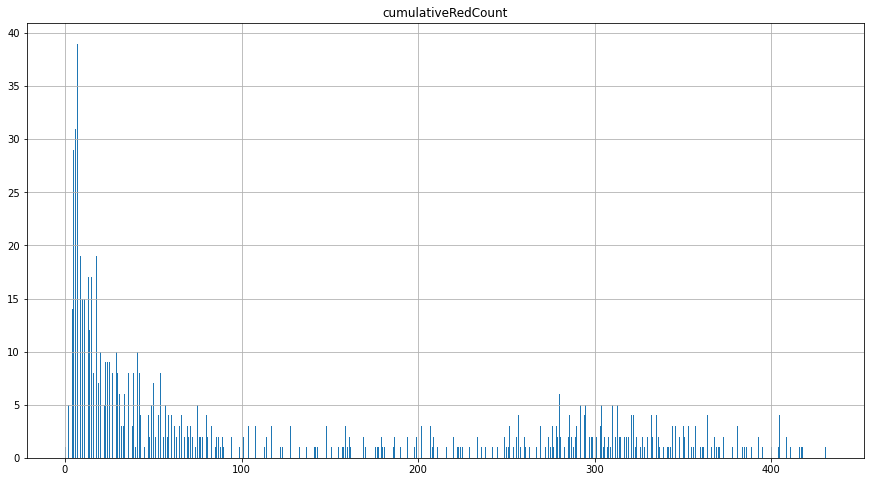

In [12]:
rundf.hist(column="cumulativeRedCount",bins=1000,figsize=(15,8))

## 3 symptomatic agent cumulative count vs. time 

<AxesSubplot:title={'center':'symptomatic agent cumulative count vs. time'}, xlabel='ticks', ylabel='cumulativeRedCount'>

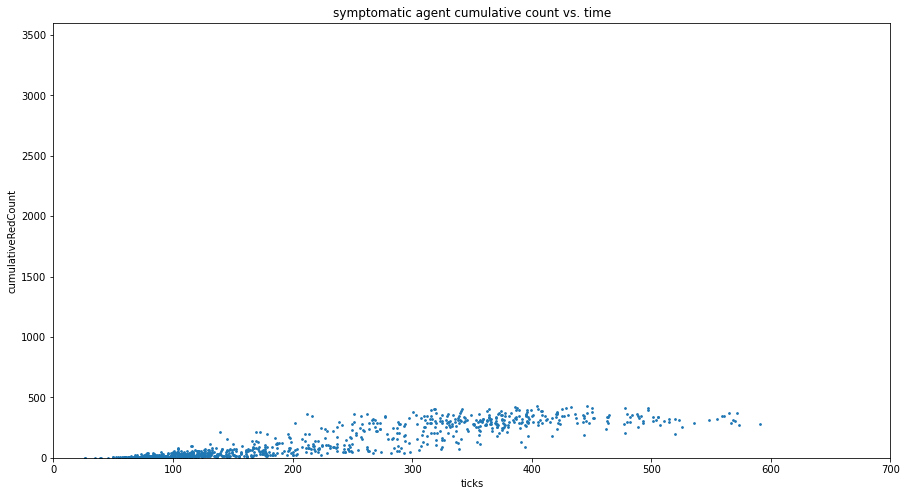

In [13]:
rundf.plot(x="ticks",y="cumulativeRedCount",s=3,kind='scatter',figsize=(15,8), 
           title="symptomatic agent cumulative count vs. time",
           ylim=(0,3600),xlim=(0,700))

## 4 symptomatic + asymptomatic agent cumulative count

array([[<AxesSubplot:title={'center':'totalInfected'}>]], dtype=object)

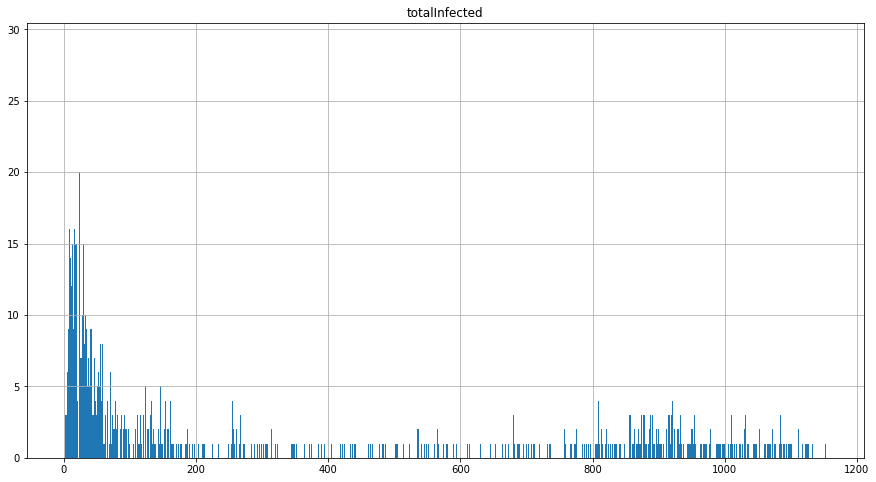

In [14]:
rundf.hist(column="totalInfected",bins=1000,figsize=(15,8))

## 5 total number of deceased

array([[<AxesSubplot:title={'center':'cumulativeDeadCount'}>]],
      dtype=object)

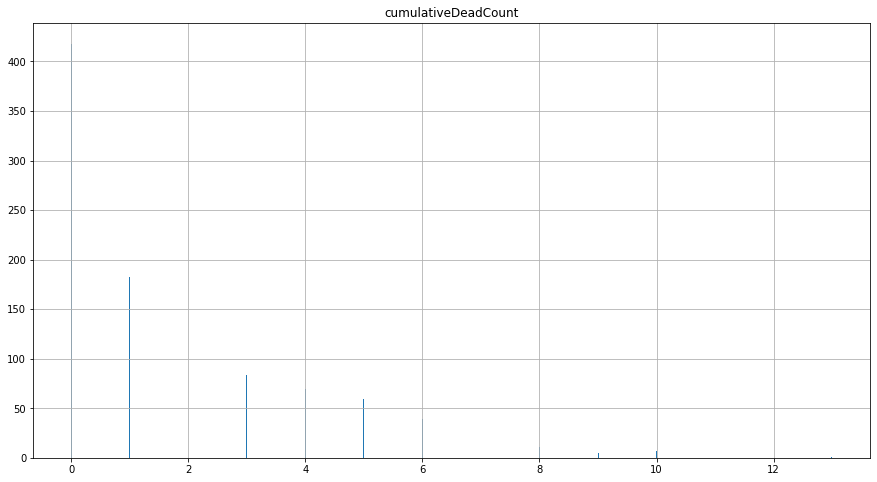

In [15]:
rundf.hist(column="cumulativeDeadCount",bins=1000,figsize=(15,8))

## 6 symptomatic + asymptomatic + deceased agent cumulative count

array([[<AxesSubplot:title={'center':'totalInfected&Deceased'}>]],
      dtype=object)

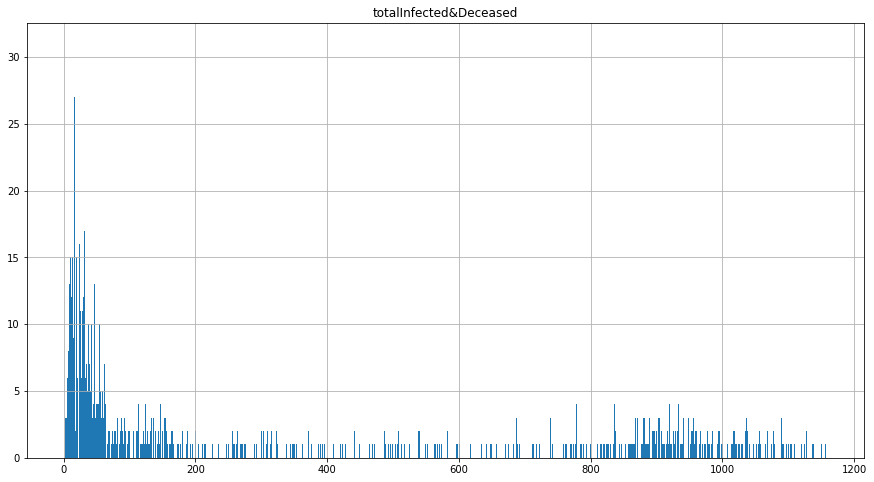

In [16]:
rundf.hist(column="totalInfected&Deceased",bins=1000,figsize=(15,8))

## 7 symptomatic + asymptomatic + deceased agent cumulative count vs. time

<AxesSubplot:title={'center':'simptomatic+asymptomatic+deceased vs. time'}, xlabel='ticks', ylabel='totalInfected&Deceased'>

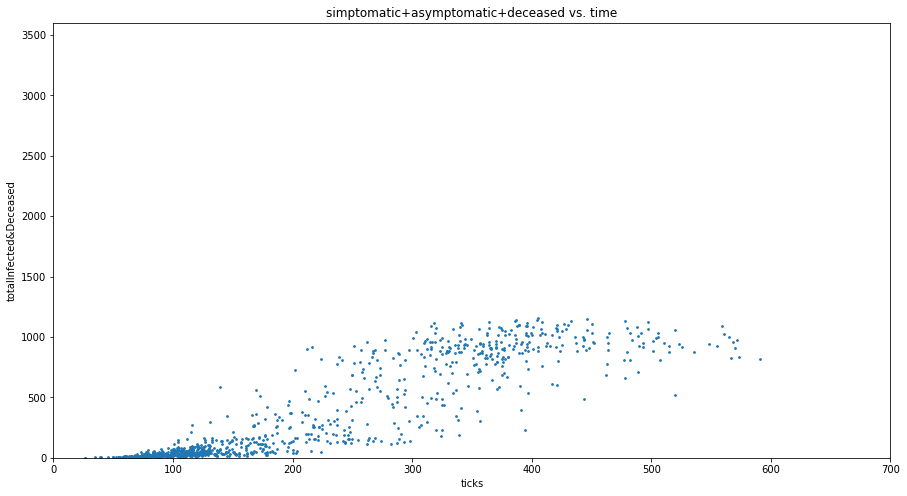

In [17]:
rundf.plot(x="ticks",y="totalInfected&Deceased",s=3,kind='scatter',figsize=(15,8), 
           title="simptomatic+asymptomatic+deceased vs. time",ylim=(0,3600),xlim=(0,700))

In [18]:
md("# --------------------------------------------------------\n"+\
    "# Time Function displaying heat-maps\n"+\
  "# --------------------------------------------------------")

# --------------------------------------------------------
# Time Function displaying heat-maps
# --------------------------------------------------------

In [19]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import LogNorm
import seaborn as sns; sns.set()

def timeFunction(day0,day1,title):
    
    rundfHere=rundf[rundf.ticks>=day0]
    rundfHere=rundfHere[rundfHere.ticks<=day1]
    
    display(md ("## Epidemics with duration between {} days ({}) and {} days ({})"\
                   .format(day0,day(day0).strftime("%Y-%m-%d"),\
                           day1,day(day1).strftime("%Y-%m-%d"))) )
    
    
    rundfHere.rename(columns={'cumulativeRedCount': 'symptomatic',
                              'ticks':"duration"},inplace=True)
    
    tmp=rundfHere[['symptomatic','totalInfected&Deceased','duration']].describe();
    display(tmp)
    display(print(tmp.to_latex()))
    
    for nBins in [10,20,30,60]:
        display(md ("## Epidemics with duration between {} days ({}) and {} days ({}), with {} bins"\
                   .format(day0,day(day0).strftime("%Y-%m-%d"),\
                           day1,day(day1).strftime("%Y-%m-%d"),nBins)) )
            
        rundfHere['totalInfected&Deceased'].plot.hist(bins=nBins, color="r",
                                            title=title+"\ntotalInfected&Deceased");
        plt.show()
        rundfHere['duration'].plot.hist(bins=nBins, color="g",
                                            title=title+"\ntotalInfected&Deceased");
        plt.show()

        # preparing data for the heat-map
        hist = plt.hist2d(x=rundfHere['duration'], y=rundfHere['totalInfected&Deceased'], 
                          bins=nBins, range=[[0, 700], [0, 3600]])
        plt.close() #to avoid the output of hist2d
        
        zMax=np.amax(hist[0]) # max level z axis
        display(md ("With {} bins, the max value on z axis is {}, first row {}"\
                    .format(nBins,zMax,np.transpose(hist[0])[0])))
        
        if nBins == 60: plt.figure(figsize=(20,10))
        else:           plt.figure(figsize=(8.5,4.25))
        
        lognorm = LogNorm(vmin=1.0, vmax=np.amax(hist[0]))
        ax = sns.heatmap(
            np.flip(np.transpose(hist[0]),0), 
            #robust=True, 
            norm=lognorm,
            cmap='YlGnBu',
            annot=True, fmt='.0f', 
            xticklabels=np.round(hist[1][1:],0).astype(int),
            yticklabels=np.flip(hist[2][1:],0).astype(int),
            annot_kws={"size":8}
            )

        plt.xlabel("Days")
        plt.ylabel("Total symptomatic + asymptomatic + deceased")

        plt.title(title)

        plt.show()


## Epidemics with duration between 0 days (2020-02-03) and 1000 days (2022-10-30)

,symptomatic,totalInfected&Deceased,duration
count,1000.00,1000.00,1000.00
mean,122.49,340.00,210.63
std,132.01,390.32,131.16
min,0.00,2.00,26.00
25%,14.00,29.00,102.00
50%,49.00,100.00,161.00
75%,257.00,774.75,323.00
max,431.00,1157.00,591.00


\begin{tabular}{lrrr}
\toprule
{} &  symptomatic &  totalInfected\&Deceased &  duration \\
\midrule
count &      1000.00 &                 1000.00 &   1000.00 \\
mean  &       122.49 &                  340.00 &    210.63 \\
std   &       132.01 &                  390.32 &    131.16 \\
min   &         0.00 &                    2.00 &     26.00 \\
25\%   &        14.00 &                   29.00 &    102.00 \\
50\%   &        49.00 &                  100.00 &    161.00 \\
75\%   &       257.00 &                  774.75 &    323.00 \\
max   &       431.00 &                 1157.00 &    591.00 \\
\bottomrule
\end{tabular}



None

## Epidemics with duration between 0 days (2020-02-03) and 1000 days (2022-10-30), with 10 bins

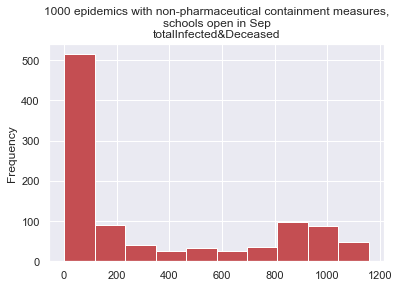

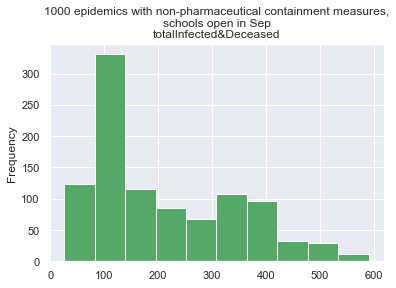

With 10 bins, the max value on z axis is 407.0, first row [ 49. 407. 120.  53.  20.   2.   0.   0.   0.   0.]

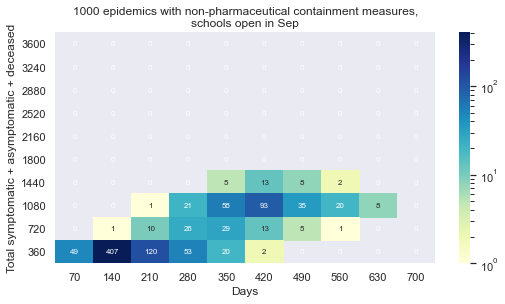

## Epidemics with duration between 0 days (2020-02-03) and 1000 days (2022-10-30), with 20 bins

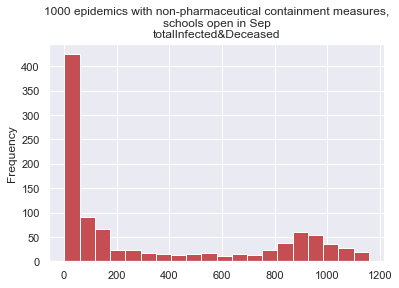

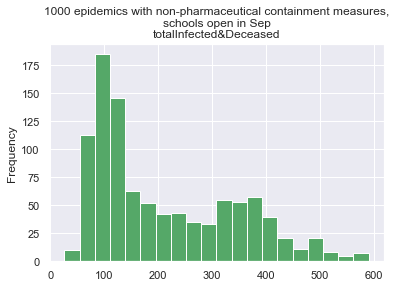

With 20 bins, the max value on z axis is 218.0, first row [  2.  47. 218. 186.  68.  32.  14.  11.   5.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]

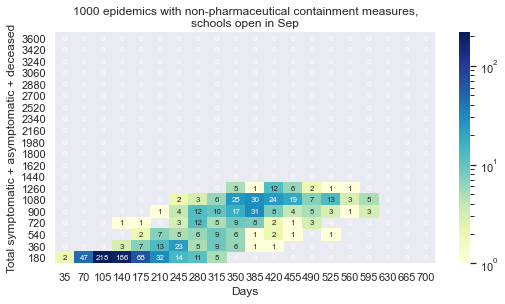

## Epidemics with duration between 0 days (2020-02-03) and 1000 days (2022-10-30), with 30 bins

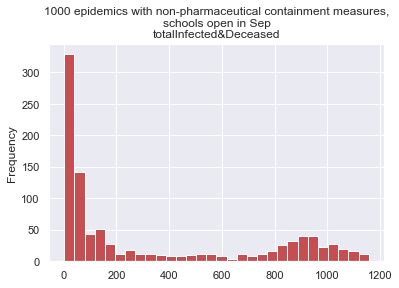

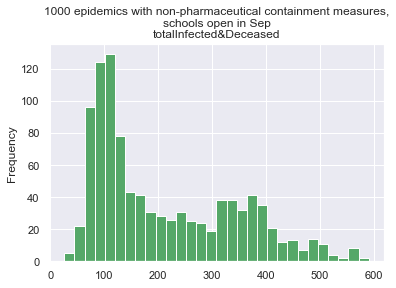

With 30 bins, the max value on z axis is 154.0, first row [  0.   6.  43. 145. 154.  95.  35.  28.   7.   2.   0.   1.   1.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.]

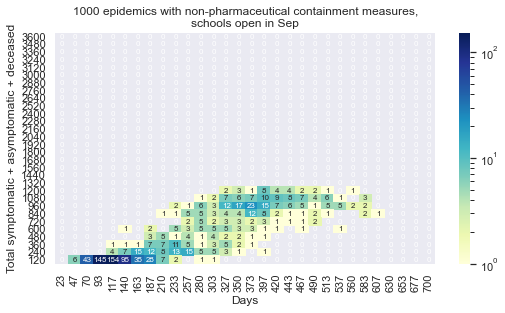

## Epidemics with duration between 0 days (2020-02-03) and 1000 days (2022-10-30), with 60 bins

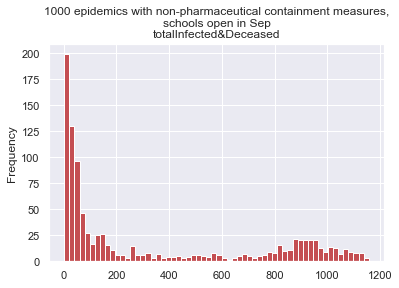

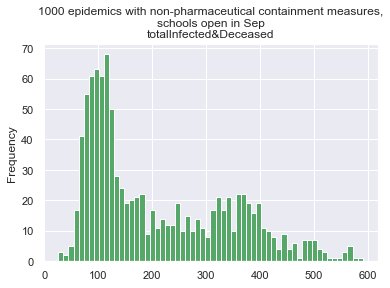

With 60 bins, the max value on z axis is 73.0, first row [ 0.  0.  2.  4.  7. 36. 70. 73. 57. 70. 43. 18. 14. 10.  7.  9.  1.  3.
  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.]

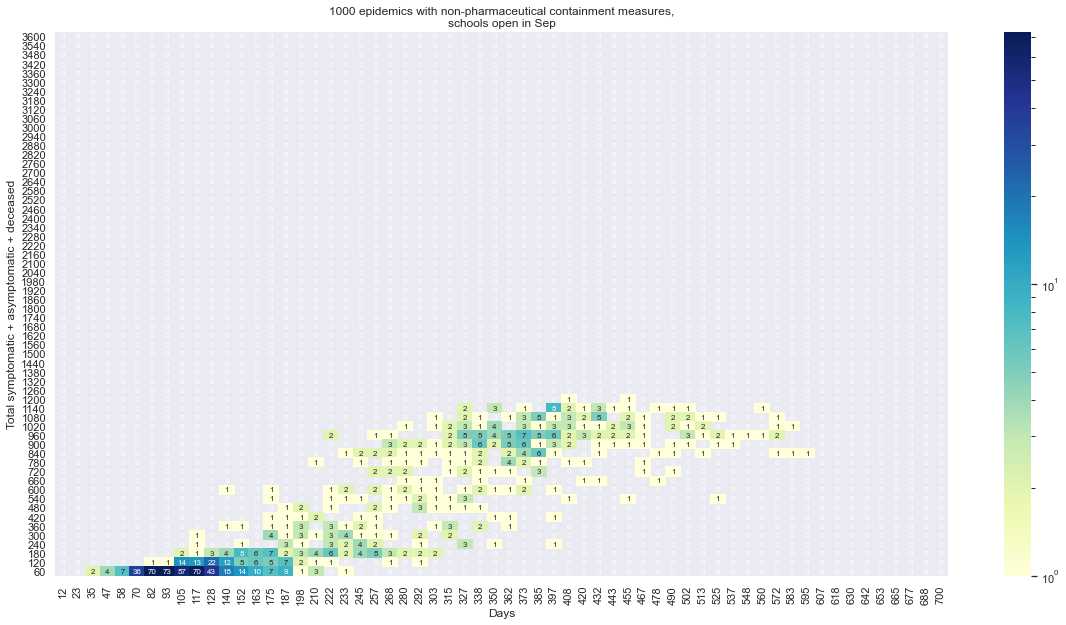

In [20]:
timeFunction(0,1000,'1000 epidemics with non-pharmaceutical containment measures,\n'+
          'schools open in Sep')

## Epidemics with duration between 0 days (2020-02-03) and 210 days (2020-08-31)

,symptomatic,totalInfected&Deceased,duration
count,590.00,590.00,590.00
mean,29.58,62.85,114.16
std,35.16,86.51,37.37
min,0.00,2.00,26.00
25%,8.00,17.00,85.00
50%,18.00,35.00,109.00
75%,37.00,67.00,135.00
max,284.00,724.00,210.00


\begin{tabular}{lrrr}
\toprule
{} &  symptomatic &  totalInfected\&Deceased &  duration \\
\midrule
count &       590.00 &                  590.00 &    590.00 \\
mean  &        29.58 &                   62.85 &    114.16 \\
std   &        35.16 &                   86.51 &     37.37 \\
min   &         0.00 &                    2.00 &     26.00 \\
25\%   &         8.00 &                   17.00 &     85.00 \\
50\%   &        18.00 &                   35.00 &    109.00 \\
75\%   &        37.00 &                   67.00 &    135.00 \\
max   &       284.00 &                  724.00 &    210.00 \\
\bottomrule
\end{tabular}



None

## Epidemics with duration between 0 days (2020-02-03) and 210 days (2020-08-31), with 10 bins

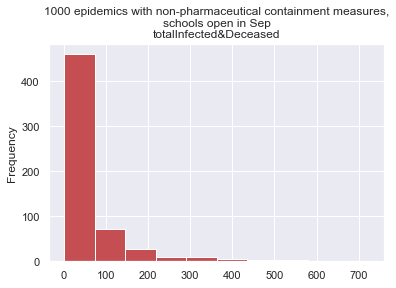

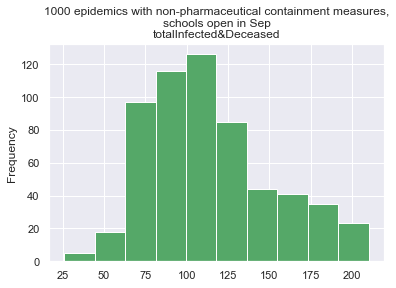

With 10 bins, the max value on z axis is 407.0, first row [ 49. 407. 120.   1.   0.   0.   0.   0.   0.   0.]

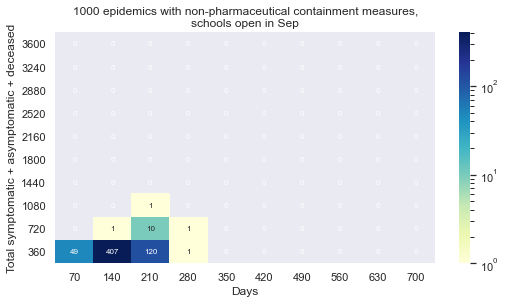

## Epidemics with duration between 0 days (2020-02-03) and 210 days (2020-08-31), with 20 bins

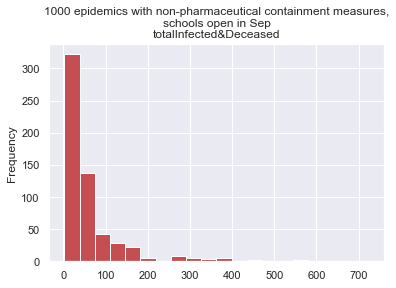

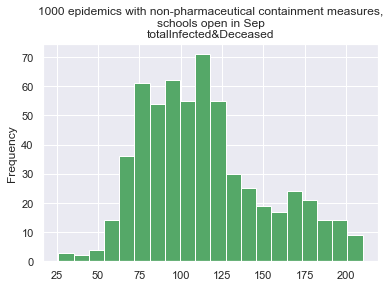

With 20 bins, the max value on z axis is 218.0, first row [  2.  47. 218. 186.  68.  32.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]

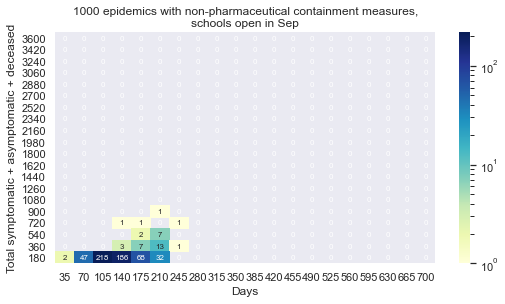

## Epidemics with duration between 0 days (2020-02-03) and 210 days (2020-08-31), with 30 bins

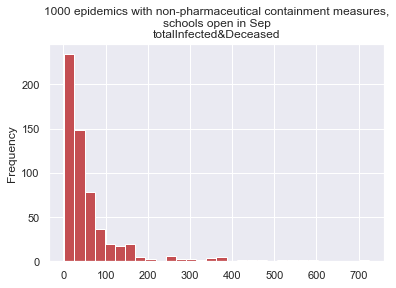

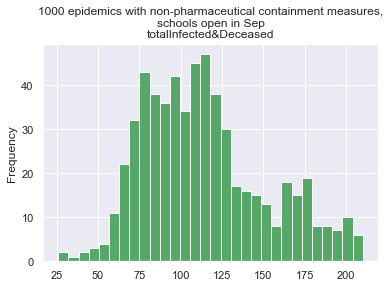

With 30 bins, the max value on z axis is 154.0, first row [  0.   6.  43. 145. 154.  95.  35.  28.   7.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.]

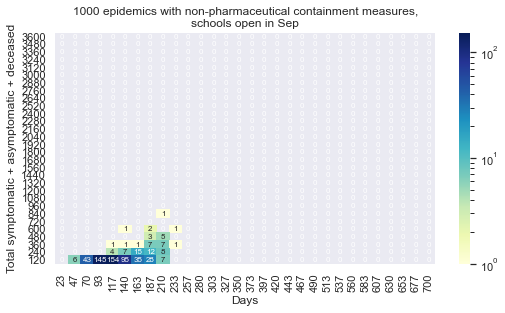

## Epidemics with duration between 0 days (2020-02-03) and 210 days (2020-08-31), with 60 bins

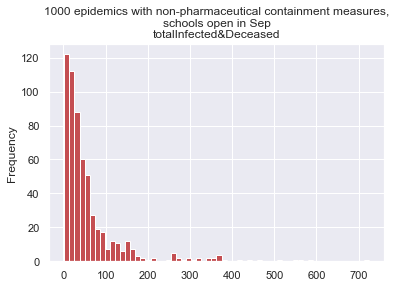

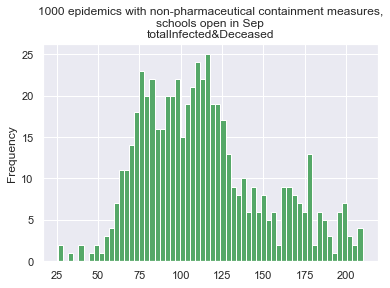

With 60 bins, the max value on z axis is 73.0, first row [ 0.  0.  2.  4.  7. 36. 70. 73. 57. 70. 43. 18. 14. 10.  7.  9.  1.  3.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.]

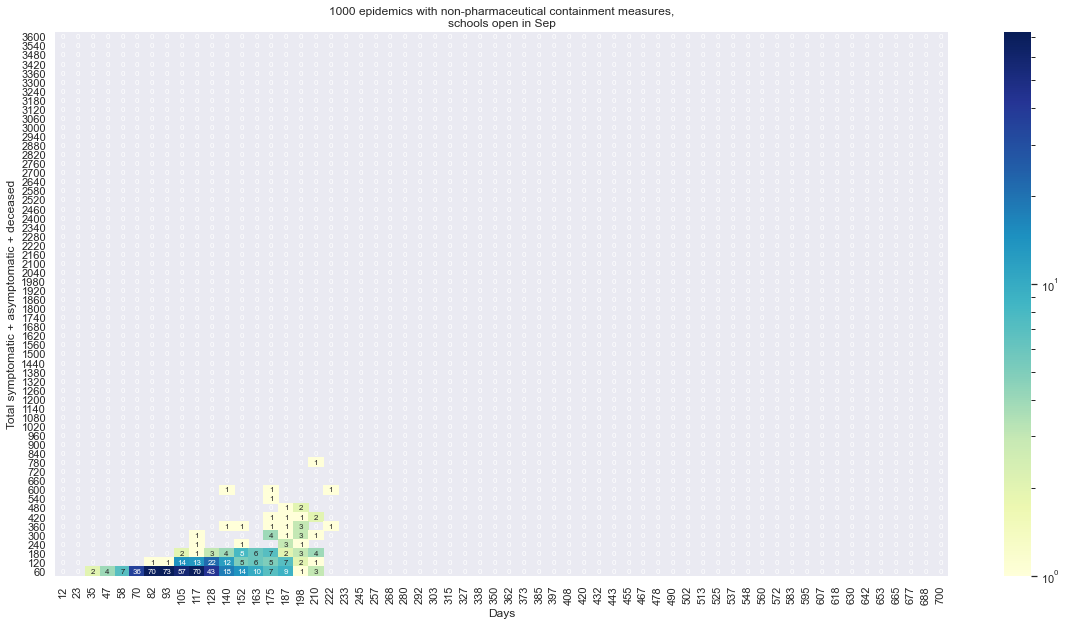

In [21]:
timeFunction(0,210,'1000 epidemics with non-pharmaceutical containment measures,\n'+
          'schools open in Sep')

## Epidemics with duration between 211 days (2020-09-01) and 422 days (2021-03-31)

,symptomatic,totalInfected&Deceased,duration
count,338.00,338.00,338.00
mean,241.59,694.59,320.33
std,104.42,309.61,59.56
min,20.00,45.00,211.00
25%,158.25,445.50,267.50
50%,273.50,806.00,326.00
75%,319.00,931.00,371.00
max,430.00,1157.00,422.00


\begin{tabular}{lrrr}
\toprule
{} &  symptomatic &  totalInfected\&Deceased &  duration \\
\midrule
count &       338.00 &                  338.00 &    338.00 \\
mean  &       241.59 &                  694.59 &    320.33 \\
std   &       104.42 &                  309.61 &     59.56 \\
min   &        20.00 &                   45.00 &    211.00 \\
25\%   &       158.25 &                  445.50 &    267.50 \\
50\%   &       273.50 &                  806.00 &    326.00 \\
75\%   &       319.00 &                  931.00 &    371.00 \\
max   &       430.00 &                 1157.00 &    422.00 \\
\bottomrule
\end{tabular}



None

## Epidemics with duration between 211 days (2020-09-01) and 422 days (2021-03-31), with 10 bins

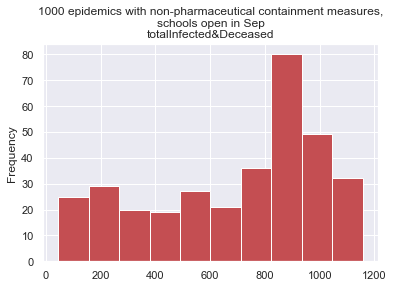

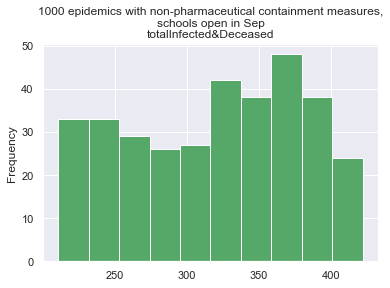

With 10 bins, the max value on z axis is 93.0, first row [ 0.  0.  0. 52. 20.  2.  0.  0.  0.  0.]

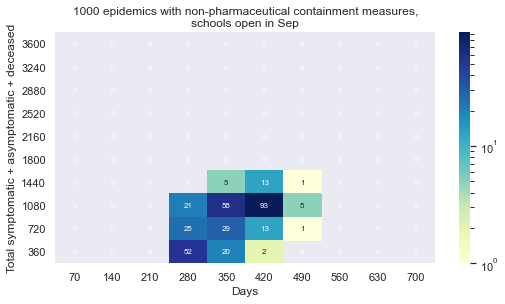

## Epidemics with duration between 211 days (2020-09-01) and 422 days (2021-03-31), with 20 bins

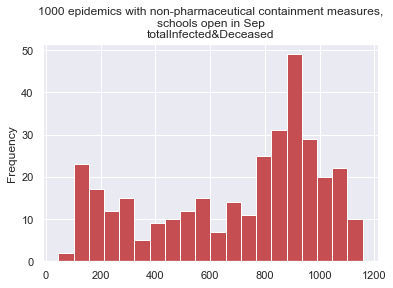

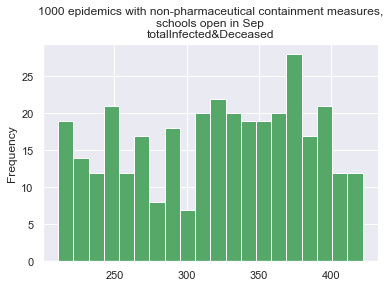

With 20 bins, the max value on z axis is 31.0, first row [ 0.  0.  0.  0.  0.  0. 14. 11.  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]

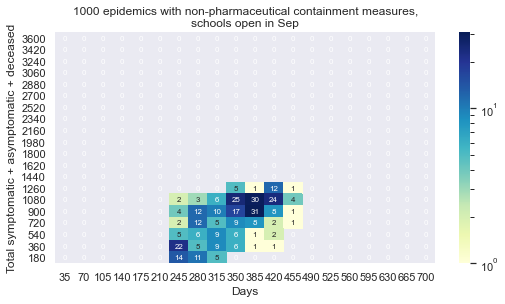

## Epidemics with duration between 211 days (2020-09-01) and 422 days (2021-03-31), with 30 bins

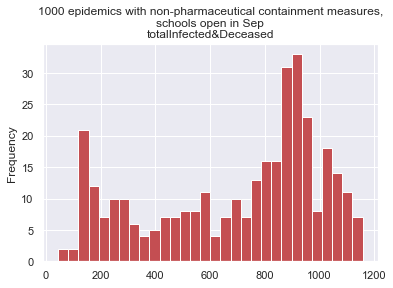

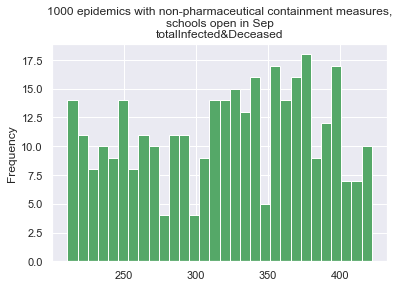

With 30 bins, the max value on z axis is 23.0, first row [0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]

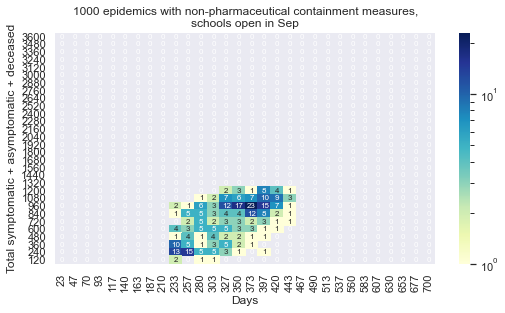

## Epidemics with duration between 211 days (2020-09-01) and 422 days (2021-03-31), with 60 bins

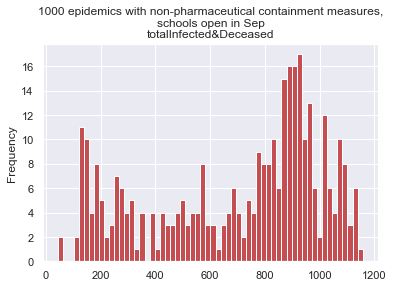

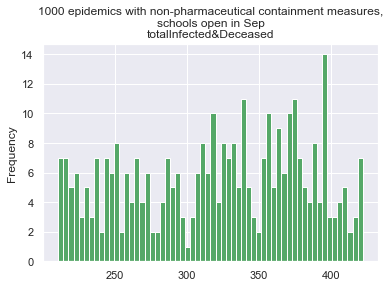

With 60 bins, the max value on z axis is 8.0, first row [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

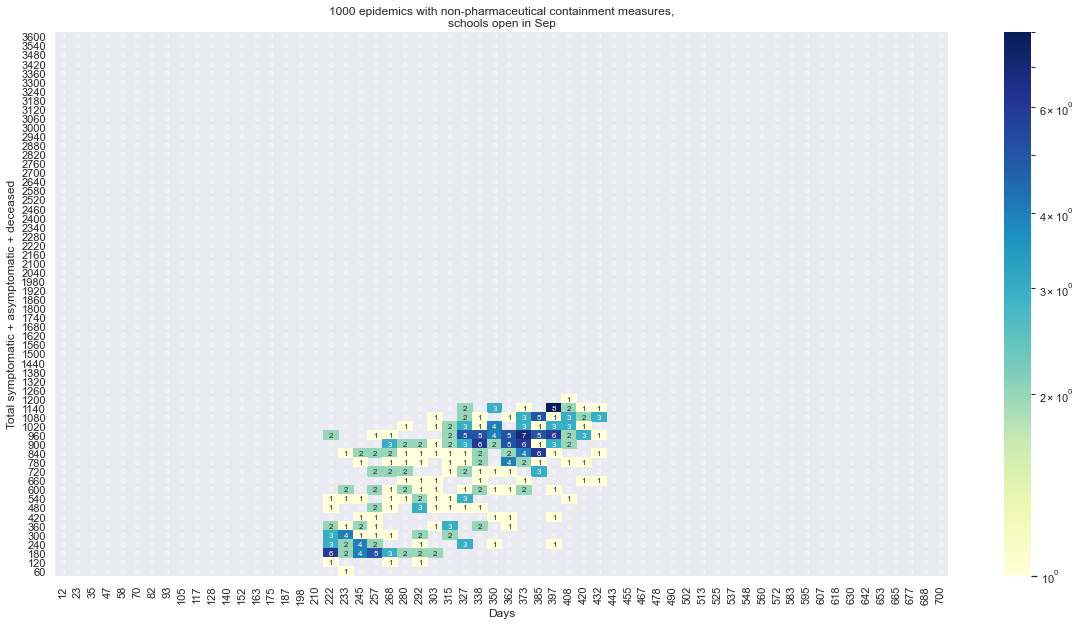

In [22]:
timeFunction(211,422,'1000 epidemics with non-pharmaceutical containment measures,\n'+
          'schools open in Sep')

## Epidemics with duration between 423 days (2021-04-01) and 1000 days (2022-10-30)

,symptomatic,totalInfected&Deceased,duration
count,72.00,72.00,72.00
mean,324.68,946.51,486.14
std,49.89,128.89,44.94
min,186.00,486.00,423.00
25%,293.75,888.50,446.00
50%,329.00,955.50,482.00
75%,353.25,1036.00,512.00
max,431.00,1151.00,591.00


\begin{tabular}{lrrr}
\toprule
{} &  symptomatic &  totalInfected\&Deceased &  duration \\
\midrule
count &        72.00 &                   72.00 &     72.00 \\
mean  &       324.68 &                  946.51 &    486.14 \\
std   &        49.89 &                  128.89 &     44.94 \\
min   &       186.00 &                  486.00 &    423.00 \\
25\%   &       293.75 &                  888.50 &    446.00 \\
50\%   &       329.00 &                  955.50 &    482.00 \\
75\%   &       353.25 &                 1036.00 &    512.00 \\
max   &       431.00 &                 1151.00 &    591.00 \\
\bottomrule
\end{tabular}



None

## Epidemics with duration between 423 days (2021-04-01) and 1000 days (2022-10-30), with 10 bins

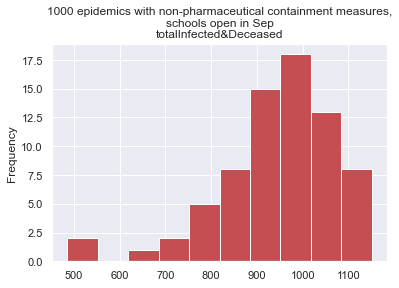

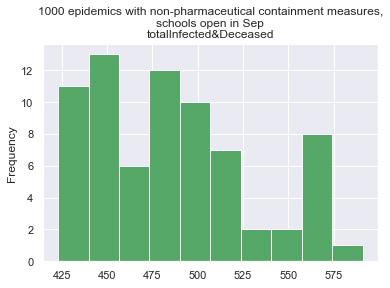

With 10 bins, the max value on z axis is 30.0, first row [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

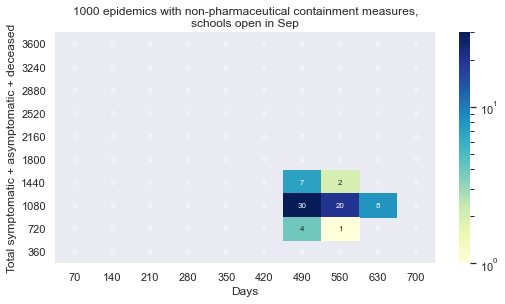

## Epidemics with duration between 423 days (2021-04-01) and 1000 days (2022-10-30), with 20 bins

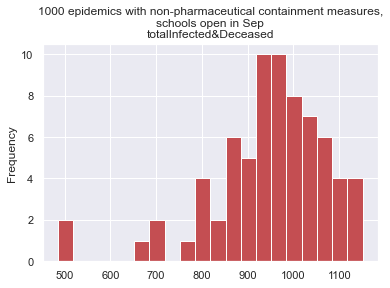

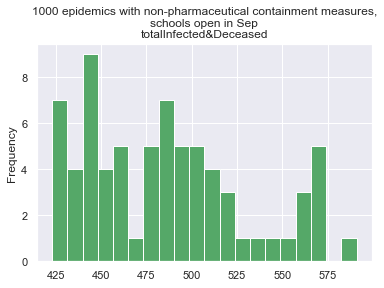

With 20 bins, the max value on z axis is 15.0, first row [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

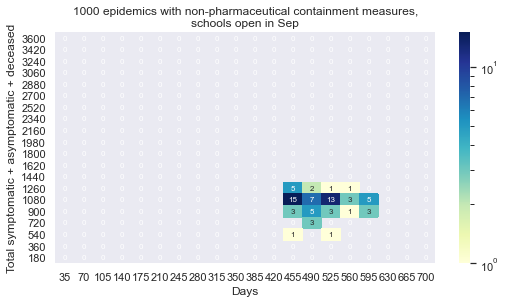

## Epidemics with duration between 423 days (2021-04-01) and 1000 days (2022-10-30), with 30 bins

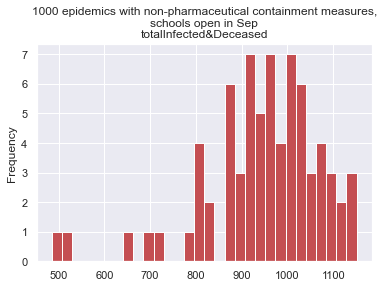

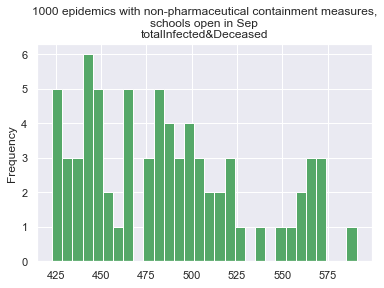

With 30 bins, the max value on z axis is 7.0, first row [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]

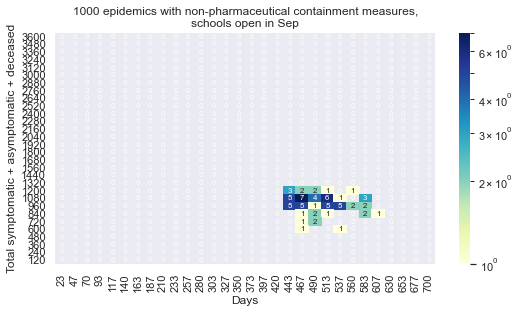

## Epidemics with duration between 423 days (2021-04-01) and 1000 days (2022-10-30), with 60 bins

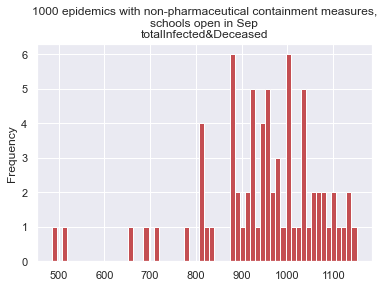

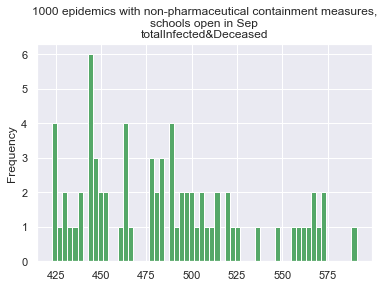

With 60 bins, the max value on z axis is 3.0, first row [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

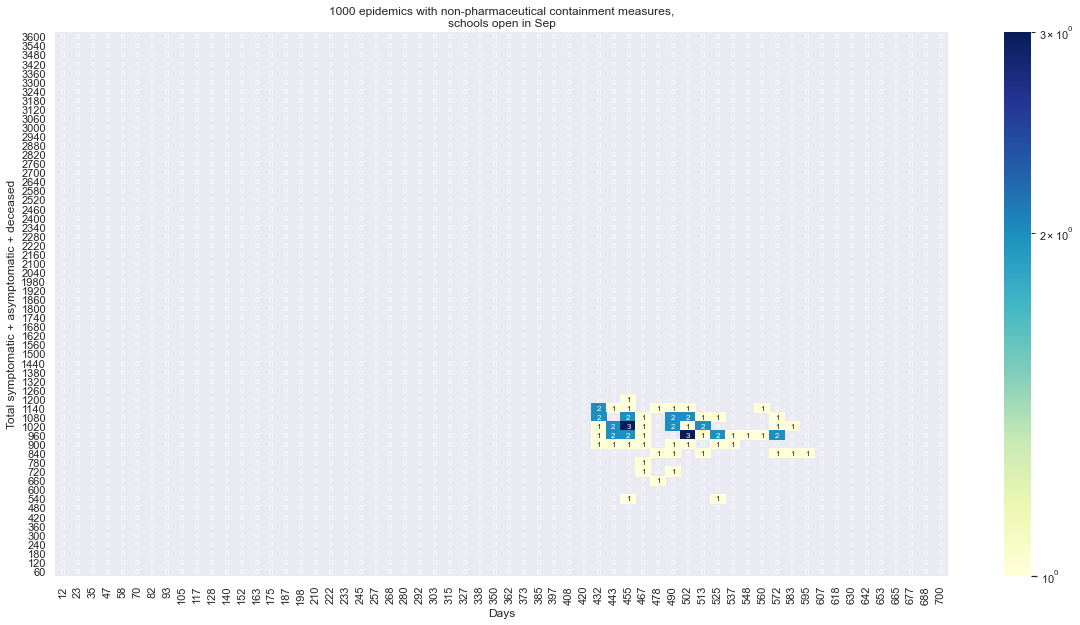

In [23]:
timeFunction(423,1000,'1000 epidemics with non-pharmaceutical containment measures,\n'+
          'schools open in Sep')